## Hauptkomponentenanalyse (PCA) am Hotel Bookings-Datensatz 

Die Faktor Loadings geben an, wie stark die ursprünglichen Variablen mit den Hauptkomponenten korrelieren. Hohe positive oder negative Werte deuten darauf hin, dass eine Variable einen starken Einfluss auf eine Komponente hat, während Werte nahe Null darauf hindeuten, dass der Einfluss gering ist. So kannst du z. B. interpretieren, welche Variablen gemeinsam variieren und wie sie zur Reduktion der Dimensionalität beitragen.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Laden des Datensatzes
dateipfad = os.path.join("/Users/danielambach/Projects/data_mining_dsba/data/processed/", "hotel_bookings_processed.csv")

df = pd.read_csv(dateipfad)

# Auswahl numerischer Variablen
df_numeric = df.select_dtypes(include=[np.number]).dropna()  # NaN entfernen

# Standardisierung der Daten (wichtig für PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)



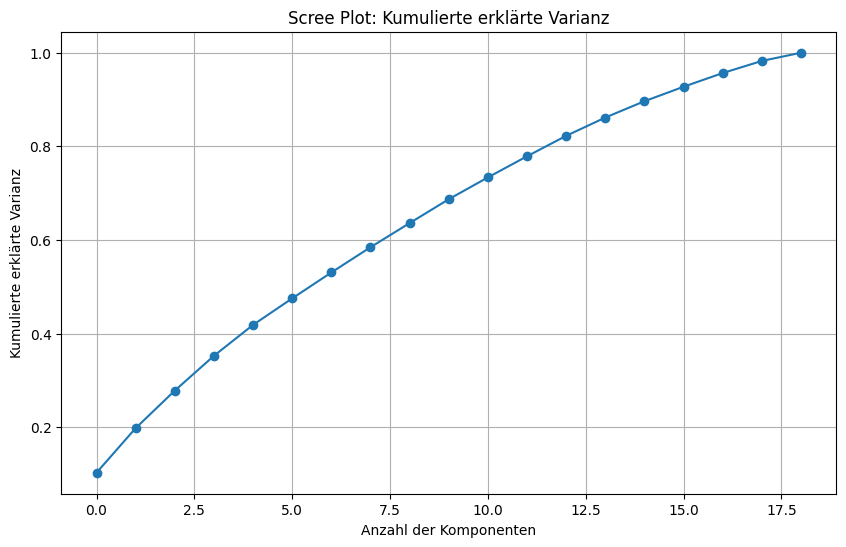

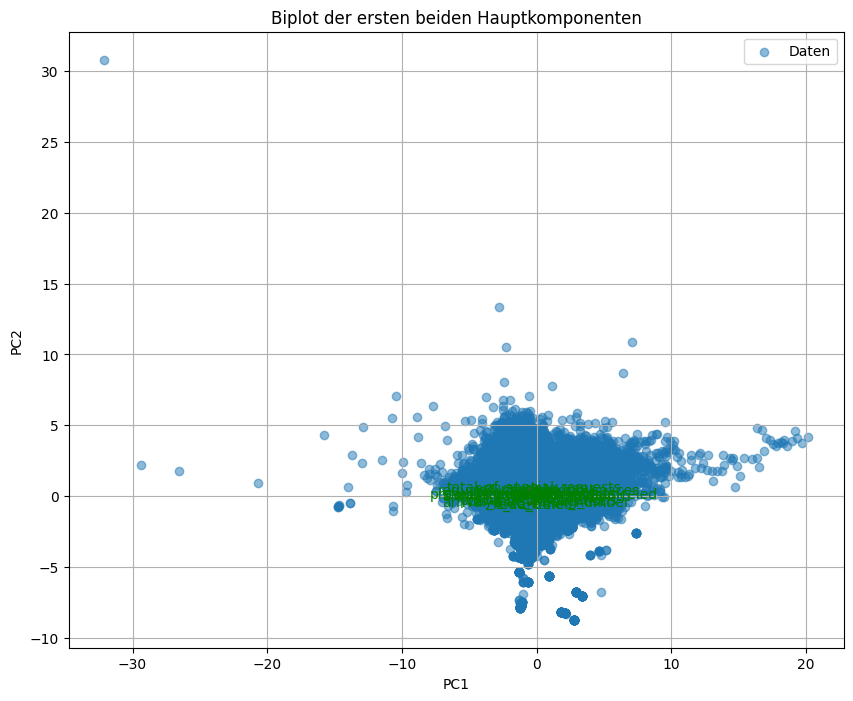

Faktor Loadings:
                                     PC1       PC2       PC3       PC4  \
is_canceled                    -0.257051 -0.508606 -0.342792 -0.025236   
lead_time                      -0.396791 -0.485239 -0.120841  0.191412   
arrival_date_year              -0.143247  0.466234 -0.723622  0.125652   
arrival_date_week_number       -0.073096 -0.355805  0.758547 -0.179117   
arrival_date_day_of_month      -0.002752 -0.001392  0.093289 -0.139337   
stays_in_weekend_nights        -0.518672  0.097290  0.188091  0.564218   
stays_in_week_nights           -0.560404  0.054858  0.161006  0.578720   
adults                         -0.456196  0.074857  0.035842 -0.166204   
children                       -0.250083  0.327987  0.078685 -0.196159   
babies                         -0.047503  0.161392  0.175353  0.015174   
is_repeated_guest               0.564549  0.129405  0.037881  0.388816   
previous_cancellations          0.137709 -0.265418  0.076514  0.248781   
previous_bookings_not

In [3]:
# PCA durchführen
pca = PCA()
pca_components = pca.fit_transform(X_scaled)

# Scree Plot: Kumulative erklärte Varianz
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Scree Plot: Kumulierte erklärte Varianz')
plt.grid(True)
plt.show()

# Biplot der ersten beiden Hauptkomponenten
# Berechnung der Faktor Loadings: (Komponenten x Eigenwerte)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(10,8))
# Plot der Daten in PC1 vs. PC2
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, label='Daten')

# Zeichnen der Vektoren für die ursprünglichen Variablen (Faktor Loadings)
for i, var in enumerate(df_numeric.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='red', alpha=0.5, head_width=0.1)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, var,
             color='green', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot der ersten beiden Hauptkomponenten')
plt.grid(True)
plt.legend()
plt.show()

# Ausgabe der Faktor Loadings in tabellarischer Form
loadings_df = pd.DataFrame(loadings, index=df_numeric.columns, 
                           columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
print("Faktor Loadings:")
print(loadings_df)

# Interpretation der Faktor Loadings:
print("\nInterpretation der Faktor Loadings:")
print("Die Werte in der Tabelle geben an, wie stark jede Variable mit den jeweiligen Hauptkomponenten korreliert.")
print("Ein hoher positiver oder negativer Wert (z.B. > 0.5 oder < -0.5) deutet darauf hin, dass die Variable stark zur Komponente beiträgt.")
print("Werte nahe 0 weisen darauf hin, dass die Variable wenig Einfluss auf die Komponente hat.")

Erklärung der Schritte

	1.	Datenvorbereitung

Es werden alle numerischen Variablen ausgewählt und fehlende Werte entfernt. Anschließend erfolgt die Standardisierung der Daten, was bei PCA essentiell ist, da Variablen in unterschiedlichen Skalen sonst den Analyseergebnissen überproportionalen Einfluss haben.

	2.	Durchführung der PCA

Mit sklearn.decomposition.PCA wird die Hauptkomponentenanalyse durchgeführt. Alle Hauptkomponenten werden extrahiert, sodass du im nächsten Schritt beurteilen kannst, wie viele Komponenten sinnvoll sind.

	3.	Scree Plot

Der Scree Plot zeigt die kumulierte erklärte Varianz in Abhängigkeit von der Anzahl der Hauptkomponenten. So kannst du erkennen, ab wann weitere Komponenten nur noch wenig zusätzliche Varianz erklären.

	4.	Biplot & Faktor Loadings

Im Biplot werden die Datenpunkte in Bezug auf die ersten beiden Hauptkomponenten abgebildet. Gleichzeitig werden die Faktor Loadings als Pfeile eingezeichnet, die anzeigen, wie die ursprünglichen Variablen in den neuen Raum projiziert werden.
Die Länge und Richtung der Pfeile helfen dabei zu verstehen, welche Variablen einen starken Einfluss auf die jeweiligen Komponenten haben und wie sie zueinander in Beziehung stehen.

	5.	Interpretation
    
Anhand der ausgegebenen Tabelle und der Visualisierung kannst du analysieren, welche Variablen signifikant zur Varianzaufklärung beitragen und wie sie sich gegenseitig beeinflussen.